In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import itertools

FEATURE CATEGORIES: <br> 
    stock measures <br> 
    google trends score <br> 
    tweets <br> 
    S&P 500 <br> 
    Gold <br> 

In [2]:
class coin():

    def __init__(self, train_data, test_data, feature_names):
        self.train_data = train_data
        self.test_data = test_data
        self.train_dataset = pd.read_csv(self.train_data)

        self.cols = self.train_dataset.columns
        self.label_ind = [self.cols.get_loc('label')]
        
        self.feature_names = feature_names
        
    def find_features(self):
        col_inds = []
        for f in self.feature_names:
            col_inds.append(self.cols.get_loc(f))
        self.col_inds = col_inds

    def train_model(self, max_iters=None):
        
        self.find_features()

        # get train data
        X = pd.read_csv(self.train_data,usecols=self.col_inds)
        y = pd.read_csv(self.train_data,usecols=self.label_ind)

        X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), random_state = 1234)

        # set up model
        lr = LogisticRegression(random_state=1234)
        if max_iters:
            lr.max_iter=max_iters
        else:
            lr.max_iter=1000
        

        #fit and predict model
        lr.fit(X_train, y_train)
        y_hat=lr.predict(X_test)
        confusion = metrics.confusion_matrix(y_test, y_hat)
        score = accuracy_score(y_test,y_hat)

        self.model = lr
        self.train_score = score
        self.train_confusion = confusion

    def test_model(self):
        X_test = pd.read_csv(self.test_data,usecols=self.col_inds)
        y_test = pd.read_csv(self.test_data,usecols=self.label_ind)

        #predict model
        y_hat = self.model.predict(X_test)
        confusion = metrics.confusion_matrix(y_test, y_hat)
        score = accuracy_score(y_test, y_hat)
        self.test_score = score
        self.test_confusion = confusion


In [3]:
iter_vals = [100, 200, 500]
base_features = ['MACD', 'RSI', 'PROC_3', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', \
                'compound_weighted_avg7', 'likes_count_daily_diff', 'pos_weighted_avg7',\
                'retweets_count_weekly_diff','goog_trend_score']

bc_base = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", base_features)

for i in iter_vals:
    print('Number of iterations:', i)
    bc_base.train_model(max_iters=i)
    print(bc_base.train_score)
    print(bc_base.train_confusion)

    bc_base.test_model()
    print(bc_base.test_score)
    print(bc_base.test_confusion)


Number of iterations: 100
0.5128205128205128
[[ 55  86]
 [ 66 105]]
0.5641025641025641
[[ 49  86]
 [ 50 127]]
Number of iterations: 200
0.5128205128205128
[[ 55  86]
 [ 66 105]]
0.5641025641025641
[[ 49  86]
 [ 50 127]]
Number of iterations: 500
0.5128205128205128
[[ 55  86]
 [ 66 105]]
0.5641025641025641
[[ 49  86]
 [ 50 127]]


We see that no. of iterations doesn't do much--we will ignore going forward

In [4]:
# check base features
base_features = ['MACD', 'RSI', 'PROC_3', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', \
                'compound_weighted_avg7', 'likes_count_daily_diff', 'pos_weighted_avg7',\
                'retweets_count_weekly_diff','goog_trend_score']

bc_base = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", base_features)
bc_base.train_model(max_iters=100)
print(bc_base.train_score)
print(bc_base.train_confusion)

bc_base.test_model()
print(bc_base.test_score)
print(bc_base.test_confusion)

0.5128205128205128
[[ 55  86]
 [ 66 105]]
0.5641025641025641
[[ 49  86]
 [ 50 127]]


In [5]:
# check financial features
financial_features_final = ['RSI', 'RSI_Gold', 'RSI_SP500', 'Daily_Change_Perc_SP500',
                            'Daily_Change_Perc_Gold','wpr', 'MACD', 'PROC_3', 'streak']

bc_finance = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", financial_features_final)
bc_finance.train_model()
print(bc_finance.train_score)
print(bc_finance.train_confusion)

bc_finance.test_model()
print(bc_finance.test_score)
print(bc_finance.test_confusion)


0.5096153846153846
[[ 45  96]
 [ 57 114]]
0.5416666666666666
[[ 43  92]
 [ 51 126]]


In [6]:
# check sentiment features
sentiment_features_final = ['compound_weighted_avg7', 'compound_weighted', 'likes_count_daily_diff',
                            'retweets_count_weekly_diff', 'likes_count_avg7', 'goog_trend_score','neg_weighted',
                            'neg_weighted_avg7', 'pos_weighted_weekly_diff']

bc_sentiment = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", sentiment_features_final)
bc_sentiment.train_model()
print(bc_sentiment.train_score)
print(bc_sentiment.train_confusion)

bc_sentiment.test_model()
print(bc_sentiment.test_score)
print(bc_sentiment.test_confusion)

0.5224358974358975
[[ 48  93]
 [ 56 115]]
0.5576923076923077
[[ 40  95]
 [ 43 134]]


In [7]:
# check combined financial and sentiment features
combined_final = ['RSI', 'RSI_Gold', 'RSI_SP500', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', 'wpr', 'MACD',
            'PROC_3', 'streak', 'compound_weighted_avg7', 'compound_weighted', 'likes_count_daily_diff',
            'retweets_count_weekly_diff', 'likes_count_avg7', 'goog_trend_score', 'neg_weighted', 'neg_weighted_avg7',
            'pos_weighted_weekly_diff']

bc_combo = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", combined_final)
bc_combo.train_model()
print(bc_combo.train_score)
print(bc_combo.train_confusion)

bc_combo.test_model()
print(bc_combo.test_score)
print(bc_combo.test_confusion)

0.5064102564102564
[[ 57  84]
 [ 70 101]]
0.5833333333333334
[[ 53  82]
 [ 48 129]]


In [8]:
coefs = {}
for i, f in enumerate(combined_final):
    coefs[f] = bc_combo.model.coef_[0, i]
for k, v in coefs.items():
    print(k, v)

RSI -0.19782960129256938
RSI_Gold -0.037800596478276986
RSI_SP500 0.024604817480043353
Daily_Change_Perc_SP500 -0.08960858164066209
Daily_Change_Perc_Gold -0.09731956155574008
wpr -0.1729605670450808
MACD 0.06101302203360053
PROC_3 0.07560087268614953
streak 0.12467538055101426
compound_weighted_avg7 -0.06998192701868343
compound_weighted 0.08818671654302696
likes_count_daily_diff 0.04312891495399478
retweets_count_weekly_diff 0.28304815218944473
likes_count_avg7 -0.0030665591983262954
goog_trend_score 0.0052272796285316794
neg_weighted -0.09193655052473547
neg_weighted_avg7 -0.14396443820359325
pos_weighted_weekly_diff -0.136350527592868


In [9]:
sorted_coefs = [abs(v) for v in coefs.values()]
sorted_coefs.sort()
sorted_coefs

[0.0030665591983262954,
 0.0052272796285316794,
 0.024604817480043353,
 0.037800596478276986,
 0.04312891495399478,
 0.06101302203360053,
 0.06998192701868343,
 0.07560087268614953,
 0.08818671654302696,
 0.08960858164066209,
 0.09193655052473547,
 0.09731956155574008,
 0.12467538055101426,
 0.136350527592868,
 0.14396443820359325,
 0.1729605670450808,
 0.19782960129256938,
 0.28304815218944473]

**TEST ON FEATURES WITH LARGE COEFFICIENTS**

In [10]:
# Most valuable features

val_features = ['streak', 'pos_weighted_weekly_diff','neg_weighted_avg7','wpr',
                'RSI', 'retweets_count_weekly_diff']

bc_val = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", val_features)
bc_val.train_model()
print(bc_val.train_score)
print(bc_val.train_confusion)

bc_val.test_model()
print(bc_val.test_score)
print(bc_val.test_confusion)
print(bc_val.model.coef_)

0.4935897435897436
[[ 37 104]
 [ 54 117]]
0.5416666666666666
[[ 34 101]
 [ 42 135]]
[[-5.24627941e-03  1.00920735e-01 -1.94020573e-02 -6.74949493e-05
   2.18239715e-01  3.46770980e-02]]


**Train ONLY on S&P 500, gold, google trends score**

In [11]:
naive_features = ['Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', 'goog_trend_score']

bc_naive = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", naive_features)
bc_naive.train_model()
print(bc_naive.train_score)
print(bc_naive.train_confusion)

bc_naive.test_model()
print(bc_naive.test_score)
print(bc_naive.test_confusion)

0.5384615384615384
[[ 16 125]
 [ 19 152]]
0.5801282051282052
[[ 20 115]
 [ 16 161]]


Test sparse combo

In [12]:
financial_features_final = ['RSI', 'RSI_Gold', 'RSI_SP500', 'Daily_Change_Perc_SP500',
                            'Daily_Change_Perc_Gold','wpr', 'MACD', 'PROC_3', 'streak']

sentiment_features_final = ['compound_weighted_avg7', 'compound_weighted', 'likes_count_daily_diff',
                            'retweets_count_weekly_diff', 'likes_count_avg7', 'goog_trend_score','neg_weighted',
                            'neg_weighted_avg7', 'pos_weighted_weekly_diff']


sparse_features = ['RSI', 'wpr', 'goog_trend_score', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold']

bc_sparse = coin("bitcoin_train_normal.csv", "bitcoin_test_normal.csv", sparse_features)
bc_sparse.train_model()
print(bc_sparse.train_score)
print(bc_sparse.train_confusion)

bc_sparse.test_model()
print(bc_sparse.test_score)
print(bc_sparse.test_confusion)

0.49038461538461536
[[ 32 109]
 [ 50 121]]
0.5801282051282052
[[ 45  90]
 [ 41 136]]


**DOGECOIN**

In [13]:
base_features = ['MACD', 'RSI', 'PROC_3', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', \
                'compound_weighted_avg7', 'likes_count_daily_diff', 'pos_weighted_avg7',\
                'retweets_count_weekly_diff','goog_trend_score']

doge_base = coin("dogecoin_train_normal.csv", "dogecoin_test_normal.csv", base_features)
doge_base.train_model()
print(doge_base.train_score)
print(doge_base.train_confusion)

doge_base.test_model()
print(doge_base.test_score)
print(doge_base.test_confusion)



0.7957317073170732
[[261   0]
 [ 67   0]]
0.8109756097560976
[[266   1]
 [ 61   0]]


In [14]:
# check financial features
financial_features_final = ['RSI', 'RSI_Gold', 'RSI_SP500', 'Daily_Change_Perc_SP500',
                            'Daily_Change_Perc_Gold','wpr', 'MACD', 'PROC_3', 'streak']

doge_finance = coin("dogecoin_train_normal.csv", "dogecoin_test_normal.csv", financial_features_final)
doge_finance.train_model()
print(doge_finance.train_score)
print(doge_finance.train_confusion)

doge_finance.test_model()
print(doge_finance.test_score)
print(doge_finance.test_confusion)


0.7926829268292683
[[260   1]
 [ 67   0]]
0.8109756097560976
[[265   2]
 [ 60   1]]


In [15]:
sentiment_features_final = ['compound_weighted_avg7', 'compound_weighted', 'likes_count_daily_diff',
                            'retweets_count_weekly_diff', 'likes_count_avg7', 'goog_trend_score','neg_weighted',
                            'neg_weighted_avg7', 'pos_weighted_weekly_diff']

doge_sentiment = coin("dogecoin_train_normal.csv", "dogecoin_test_normal.csv", sentiment_features_final)
doge_sentiment.train_model()
print(doge_sentiment.train_score)
print(doge_sentiment.train_confusion)

doge_sentiment.test_model()
print(doge_sentiment.test_score)
print(doge_sentiment.test_confusion)



0.7957317073170732
[[261   0]
 [ 67   0]]
0.8140243902439024
[[267   0]
 [ 61   0]]


In [16]:
# check both
combined_final = ['RSI', 'RSI_Gold', 'RSI_SP500', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', 'wpr', 'MACD',
            'PROC_3', 'streak', 'compound_weighted_avg7', 'compound_weighted', 'likes_count_daily_diff',
            'retweets_count_weekly_diff', 'likes_count_avg7', 'goog_trend_score', 'neg_weighted', 'neg_weighted_avg7',
            'pos_weighted_weekly_diff']

doge_combo = coin("dogecoin_train_normal.csv", "dogecoin_test_normal.csv", combined_final)
doge_combo.train_model()
print(doge_combo.train_score)
print(doge_combo.train_confusion)

doge_combo.test_model()
print(doge_combo.test_score)
print(doge_combo.test_confusion)

0.7957317073170732
[[261   0]
 [ 67   0]]
0.8109756097560976
[[266   1]
 [ 61   0]]


In [17]:
coefs = {}
for i, f in enumerate(combined_final):
    coefs[f] = doge_combo.model.coef_[0, i]
for k, v in coefs.items():
    print(k, v)

RSI 0.10295593948610059
RSI_Gold -0.05676170209286166
RSI_SP500 0.17701101653129594
Daily_Change_Perc_SP500 -0.10153168359798781
Daily_Change_Perc_Gold 1.171584704374162
wpr -0.07568780005356415
MACD 0.07171413521119072
PROC_3 -0.14095568476401835
streak -0.1345656934741825
compound_weighted_avg7 -0.10596021658526344
compound_weighted -0.3656502826023437
likes_count_daily_diff 0.006304129510958132
retweets_count_weekly_diff -0.012768599713037353
likes_count_avg7 0.0976873757480095
goog_trend_score 0.3811167357976115
neg_weighted 0.157449619296527
neg_weighted_avg7 0.09530139057825703
pos_weighted_weekly_diff -0.1911170312704625


In [18]:
sorted_coefs = [abs(v) for v in coefs.values()]
sorted_coefs.sort()
sorted_coefs

[0.006304129510958132,
 0.012768599713037353,
 0.05676170209286166,
 0.07171413521119072,
 0.07568780005356415,
 0.09530139057825703,
 0.0976873757480095,
 0.10153168359798781,
 0.10295593948610059,
 0.10596021658526344,
 0.1345656934741825,
 0.14095568476401835,
 0.157449619296527,
 0.17701101653129594,
 0.1911170312704625,
 0.3656502826023437,
 0.3811167357976115,
 1.171584704374162]

In [19]:
val_features = ['goog_trend_score']

doge_val = coin("dogecoin_train_normal.csv", "dogecoin_test_normal.csv", val_features)
doge_val.train_model()
print(doge_val.train_score)
print(doge_val.train_confusion)

doge_val.test_model()
print(doge_val.test_score)
print(doge_val.test_confusion)
print(doge_val.model.coef_)


0.7957317073170732
[[261   0]
 [ 67   0]]
0.8140243902439024
[[267   0]
 [ 61   0]]
[[-0.3863609]]


In [20]:
naive_features = ['Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', 'goog_trend_score']

doge_naive = coin("dogecoin_train.csv", "dogecoin_test.csv", naive_features)
doge_naive.train_model()
print(doge_naive.train_score)
print(doge_naive.train_confusion)

doge_naive.test_model()
print(doge_naive.test_score)
print(doge_naive.test_confusion)


0.7957317073170732
[[261   0]
 [ 67   0]]
0.8140243902439024
[[267   0]
 [ 61   0]]


In [21]:
sparse_features = ['MACD', 'PROC_3', 'goog_trend_score', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold']

doge_sparse = coin("dogecoin_train.csv", "dogecoin_test.csv", sparse_features)
doge_sparse.train_model()
print(doge_sparse.train_score)
print(doge_sparse.train_confusion)

doge_sparse.test_model()
print(doge_sparse.test_score)
print(doge_sparse.test_confusion)


0.7957317073170732
[[261   0]
 [ 67   0]]
0.8140243902439024
[[267   0]
 [ 61   0]]


**CHARTS**

In [22]:
import matplotlib.pyplot as plt


bitcoin_accs = {'Features': ['Base', 'Finance', 'Sentiment', 'Combo', 'Valuable', 
                            'Naive', 'Sparse'],
                'Scores': [bc_base.test_score, bc_finance.test_score, bc_sentiment.test_score,
                         bc_combo.test_score, bc_val.test_score, bc_naive.test_score,
                        bc_sparse.test_score]}

bitcoin_accs = pd.DataFrame(data=bitcoin_accs)

doge_accs = {'Features': ['Base', 'Finance', 'Sentiment', 'Combo', 'Valuable', 'Naive', 'Sparse'],
             'Scores':[doge_base.test_score, doge_finance.test_score, doge_sentiment.test_score, 
                     doge_combo.test_score, doge_val.test_score, doge_naive.test_score,
                     doge_sparse.test_score]}

doge_accs = pd.DataFrame(data=doge_accs)

<AxesSubplot:xlabel='Features'>

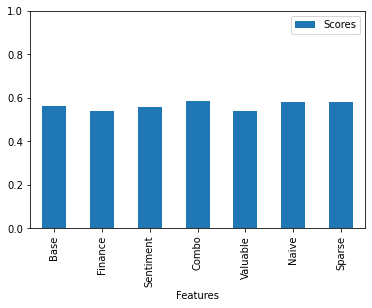

In [23]:
bitcoin_accs.plot.bar(x='Features', y='Scores', ylim=(0,1))


<AxesSubplot:xlabel='Features'>

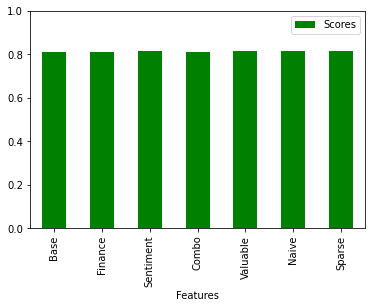

In [25]:
doge_accs.plot.bar(x='Features', y='Scores', ylim=(0,1), color='Green')